In [1]:
import time
import random
import matplotlib.pyplot as plt
import tracemalloc

In [2]:
ads = [
    ('A1', 2, 60),
    ('A2', 1, 100),
    ('A3', 3, 20),
    ('A4', 2, 40),
    ('A5', 1, 20),
    ('A6', 3, 70),
    ('A7', 2, 50)
]

In [3]:
def job_sequencing(ads):
    # Sort by profit in descending order
    ads.sort(key=lambda x: x[2], reverse=True)

    max_deadline = max(ad[1] for ad in ads)
    slots = [-1] * (max_deadline + 1)

    total_profit = 0
    scheduled_ads = []

    for ad in ads:
        ad_id, deadline, profit = ad
        for t in range(deadline, 0, -1):
            if slots[t] == -1:
                slots[t] = ad_id
                total_profit += profit
                scheduled_ads.append(ad)
                break

    return scheduled_ads, total_profit

In [4]:
scheduled, profit = job_sequencing(ads)
print("Scheduled Ads:", [ad[0] for ad in scheduled])
print("Total Revenue:", profit)

Scheduled Ads: ['A2', 'A6', 'A1']
Total Revenue: 230


In [5]:
sizes = [10, 50, 100, 200, 300, 400, 500]  # input sizes
times = []
spaces = []
profits = []

In [6]:
for n in sizes:
    # Generate random ads (id, deadline, profit)
    ads = [(f"A{i}", random.randint(1, n//10 + 5), random.randint(10, 1000)) for i in range(n)]

    # Time measurement
    start = time.time()
    scheduled, total_profit = job_sequencing(ads)
    end = time.time()
    times.append(end - start)
    profits.append(total_profit)

    # Space measurement
    tracemalloc.start()
    job_sequencing(ads)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    spaces.append(peak / 1024)

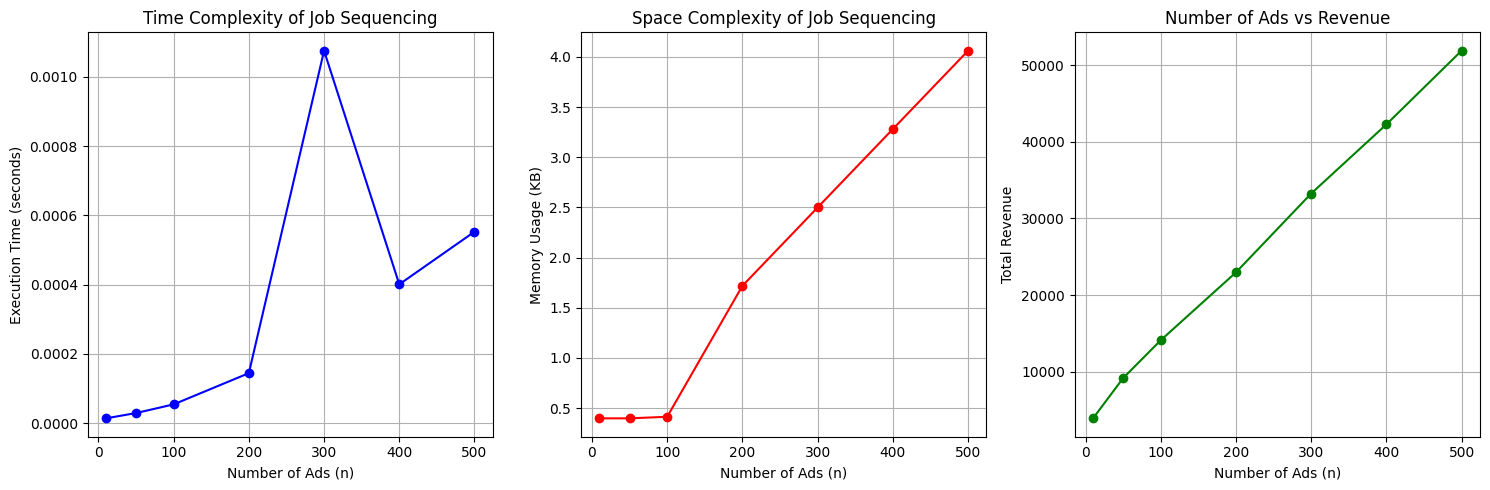

In [7]:
plt.figure(figsize=(15,5))

# Time Complexity Graph
plt.subplot(1,3,1)
plt.plot(sizes, times, marker='o', color='blue')
plt.title("Time Complexity of Job Sequencing")
plt.xlabel("Number of Ads (n)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)

# Space Complexity Graph
plt.subplot(1,3,2)
plt.plot(sizes, spaces, marker='o', color='red')
plt.title("Space Complexity of Job Sequencing")
plt.xlabel("Number of Ads (n)")
plt.ylabel("Memory Usage (KB)")
plt.grid(True)

# Ads vs Revenue Graph
plt.subplot(1,3,3)
plt.plot(sizes, profits, marker='o', color='green')
plt.title("Number of Ads vs Revenue")
plt.xlabel("Number of Ads (n)")
plt.ylabel("Total Revenue")
plt.grid(True)

plt.tight_layout()
plt.show()